In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from API_key import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=2000)
lngs = np.random.uniform(low=-180, high=180, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities and country codes.
cities = []
countries = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    country=citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count.
print(len(cities))
print(len(countries))

753
753


In [12]:
import requests
requests.__version__

'2.24.0'

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
city_data = []
# Create counters.
record_count = 1
set_count = 1
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Beginning Data Retrieval      ")
print("-----------------------------")
# Loop through all the cities in the list. With enumerate you get index and element at the same time!!!
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval      
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=bacuit
City not found. Skipping...
Processing Record 1 of Set 1 | bacuit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tasiilaq
Processing Record 3 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tongling
Processing Record 4 of Set 1 | tongling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=lolua
City not found. Skipping...
Processing Record 5 of Set 1 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 4 of Set 2 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=klodzko
Processing Record 5 of Set 2 | klodzko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=mar+del+plata
Processing Record 6 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tubruq
City not found. Skipping...
Processing Record 7 of Set 2 | tubruq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=kazalinsk
City not found. Skipping...
Processing Record 8 of Set 2 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=galgani
City not found. Skipping...
Processing Record 9 of Set 2 | galgani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=calvi

Processing Record 8 of Set 3 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=east+london
Processing Record 9 of Set 3 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=cotija
City not found. Skipping...
Processing Record 10 of Set 3 | cotija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=moindou
Processing Record 11 of Set 3 | moindou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=saskylakh
Processing Record 12 of Set 3 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=ostrovnoy
Processing Record 13 of Set 3 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=bengkulu
Processing Record 14 of Set 3 | bengkulu
http://a

Processing Record 12 of Set 4 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=khatanga
Processing Record 13 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=san+quintin
Processing Record 14 of Set 4 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=kloulklubed
Processing Record 15 of Set 4 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tidore
City not found. Skipping...
Processing Record 16 of Set 4 | tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=turbat
Processing Record 17 of Set 4 | turbat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=sao+geraldo+do+araguaia
Processing Record 18 of Set 4 | sao g

City not found. Skipping...
Processing Record 15 of Set 5 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=nieves
Processing Record 16 of Set 5 | nieves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=klaksvik
Processing Record 17 of Set 5 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tingi
Processing Record 18 of Set 5 | tingi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=mys+shmidta
City not found. Skipping...
Processing Record 19 of Set 5 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=jiutai
Processing Record 20 of Set 5 | jiutai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=katobu
Processing Record 21 of Set 5 | katob

Processing Record 18 of Set 6 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=alzamay
Processing Record 19 of Set 6 | alzamay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=plettenberg+bay
Processing Record 20 of Set 6 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=nampa
Processing Record 21 of Set 6 | nampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=salta
Processing Record 22 of Set 6 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=hami
Processing Record 23 of Set 6 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=yunjinghong
City not found. Skipping...
Processing Record 24 of Set 6 | yunjinghong
http://api

Processing Record 22 of Set 7 | nanyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=arnoldstein
Processing Record 23 of Set 7 | arnoldstein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tessalit
Processing Record 24 of Set 7 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=usinsk
Processing Record 25 of Set 7 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=angamacutiro
City not found. Skipping...
Processing Record 26 of Set 7 | angamacutiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=verkhnevilyuysk
Processing Record 27 of Set 7 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=belushya+guba
City not found. Skipping..

Processing Record 28 of Set 8 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tomatlan
Processing Record 29 of Set 8 | tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=simpang
Processing Record 30 of Set 8 | simpang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=bouna
Processing Record 31 of Set 8 | bouna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=guanica
Processing Record 32 of Set 8 | guanica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=yurla
Processing Record 33 of Set 8 | yurla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=manzhouli
Processing Record 34 of Set 8 | manzhouli
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 33 of Set 9 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=ulaanbaatar
Processing Record 34 of Set 9 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=dwarka
Processing Record 35 of Set 9 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=darhan
Processing Record 36 of Set 9 | darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=dudinka
Processing Record 37 of Set 9 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=leningradskiy
Processing Record 38 of Set 9 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=murree
Processing Record 39 of Set 9 | murree
http://api.openweathermap.org/data

Processing Record 36 of Set 10 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=reshetylivka
Processing Record 37 of Set 10 | reshetylivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=san+ignacio
Processing Record 38 of Set 10 | san ignacio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=nantucket
Processing Record 39 of Set 10 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=piranhas
Processing Record 40 of Set 10 | piranhas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=oliveira+dos+brejinhos
Processing Record 41 of Set 10 | oliveira dos brejinhos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=santa+cruz+de+la+palma
Processing Record 42

Processing Record 42 of Set 11 | belawan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=ugoofaaru
Processing Record 43 of Set 11 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=mamaku
Processing Record 44 of Set 11 | mamaku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=broome
Processing Record 45 of Set 11 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=duldurga
Processing Record 46 of Set 11 | duldurga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=vryburg
Processing Record 47 of Set 11 | vryburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=tha+mai
Processing Record 48 of Set 11 | tha mai
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=mahajanga
Processing Record 45 of Set 12 | mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=greenfield
Processing Record 46 of Set 12 | greenfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=zhigansk
Processing Record 47 of Set 12 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=bandarbeyla
Processing Record 48 of Set 12 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=catazaja
Processing Record 49 of Set 12 | catazaja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=korla
Processing Record 50 of Set 12 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b

Processing Record 50 of Set 13 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=batsfjord
Processing Record 1 of Set 14 | batsfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=andenes
Processing Record 2 of Set 14 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=besikduzu
Processing Record 3 of Set 14 | besikduzu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=suntar
Processing Record 4 of Set 14 | suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=curaca
Processing Record 5 of Set 14 | curaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=formosa
Processing Record 6 of Set 14 | formosa
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 3 of Set 15 | jatai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=lanat
Processing Record 4 of Set 15 | lanat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=kushima
Processing Record 5 of Set 15 | kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=prescott
Processing Record 6 of Set 15 | prescott
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=nova+soure
Processing Record 7 of Set 15 | nova soure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=sao+paulo+de+olivenca
Processing Record 8 of Set 15 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bbffb34234319f9ca6d87a4bf4587c7&q=mount+isa
Processing Record 9 of Set 15 | mount isa
http://api.openweath

In [16]:
print(len(city_data))

694


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,31.96,97,100,6.76,RU,2020-10-03 22:27:26
1,Torbay,47.67,-52.73,60.01,93,90,14.99,CA,2020-10-03 22:30:38
2,Vaini,-21.20,-175.20,75.20,88,90,11.41,TO,2020-10-03 22:30:38
3,Hermanus,-34.42,19.23,60.01,86,23,5.99,ZA,2020-10-03 22:30:38
4,Port Elizabeth,-33.92,25.57,60.80,93,90,13.87,ZA,2020-10-03 22:30:38
5,Keti Bandar,24.14,67.45,80.76,84,17,10.49,PK,2020-10-03 22:30:39
6,Hobart,-42.88,147.33,51.80,93,90,4.70,AU,2020-10-03 22:30:39
7,Tasiilaq,65.61,-37.64,33.80,64,0,10.29,GL,2020-10-03 22:28:03
8,Faya,18.39,42.45,64.40,21,0,3.36,SA,2020-10-03 22:30:39
9,Bredasdorp,-34.53,20.04,60.80,87,42,10.29,ZA,2020-10-03 22:30:39


In [12]:
# Rearrange columns
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df=new_city_data_df
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-10-03 22:27:26,69.70,170.31,31.96,97,100,6.76
1,Torbay,CA,2020-10-03 22:30:38,47.67,-52.73,60.01,93,90,14.99
2,Vaini,TO,2020-10-03 22:30:38,-21.20,-175.20,75.20,88,90,11.41
3,Hermanus,ZA,2020-10-03 22:30:38,-34.42,19.23,60.01,86,23,5.99
4,Port Elizabeth,ZA,2020-10-03 22:30:38,-33.92,25.57,60.80,93,90,13.87


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

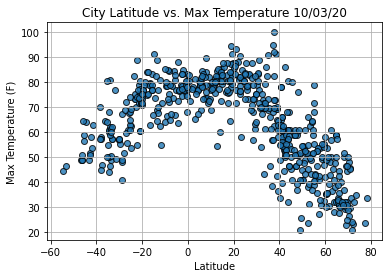

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

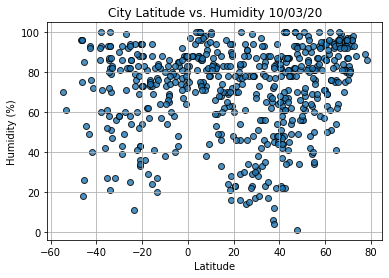

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

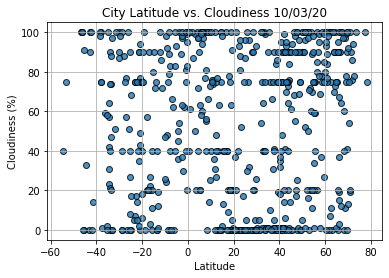

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

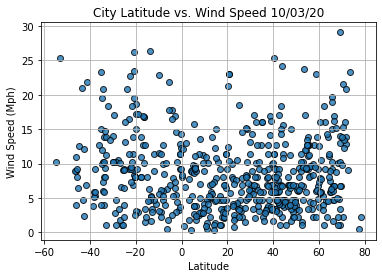

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [95]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, text_coordinates2):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rval=str(round(r_value,2))
    pval=str(round(p_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate("R and P Values are "+rval+" and "+pval, text_coordinates2, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2020-10-03 22:27:13
Lat                         68.75
Lng                         161.3
Max Temp                    29.17
Humidity                       93
Cloudiness                     11
Wind Speed                   4.85
Name: 13, dtype: object

In [22]:
#Filterig data between hemispheres, true-north & false-south
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
566     True
567    False
568     True
569     True
570    False
Name: Lat, Length: 571, dtype: bool

In [24]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-10-03 22:27:26,69.70,170.31,31.96,97,100,6.76
1,Torbay,CA,2020-10-03 22:30:38,47.67,-52.73,60.01,93,90,14.99
5,Keti Bandar,PK,2020-10-03 22:30:39,24.14,67.45,80.76,84,17,10.49
7,Tasiilaq,GL,2020-10-03 22:28:03,65.61,-37.64,33.80,64,0,10.29
8,Faya,SA,2020-10-03 22:30:39,18.39,42.45,64.40,21,0,3.36


In [25]:
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Vaini,TO,2020-10-03 22:30:38,-21.20,-175.20,75.20,88,90,11.41
3,Hermanus,ZA,2020-10-03 22:30:38,-34.42,19.23,60.01,86,23,5.99
4,Port Elizabeth,ZA,2020-10-03 22:30:38,-33.92,25.57,60.80,93,90,13.87
6,Hobart,AU,2020-10-03 22:30:39,-42.88,147.33,51.80,93,90,4.70
9,Bredasdorp,ZA,2020-10-03 22:30:39,-34.53,20.04,60.80,87,42,10.29


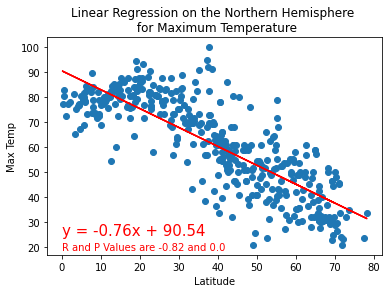

In [96]:
# Linear regression on the Northern Hemisphere MAX TEMP
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,25), (0,19))

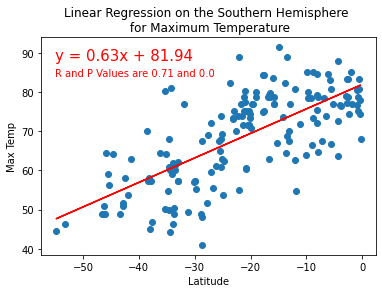

In [97]:
# Linear regression on the Southern Hemisphere MAX TEMP
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,88), (-55,84))

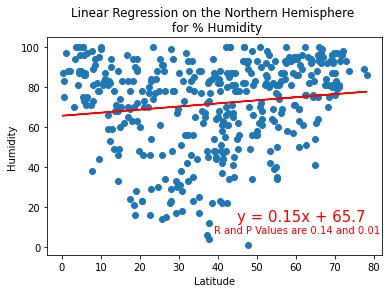

In [98]:
# Linear regression on the Northern Hemisphere HUMIDITY
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity',(45,13), (39,7))

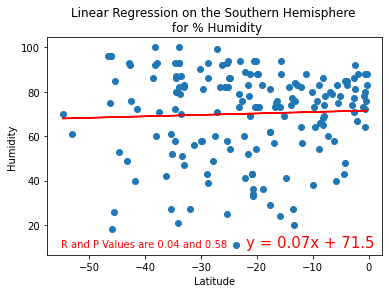

In [99]:
# Linear regression on the Southern Hemisphere HUMIDITY
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity',(-22,10), (-55,10))

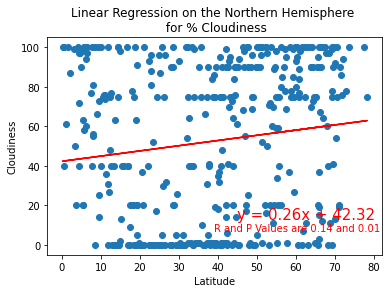

In [100]:
# Linear regression on the Northern Hemisphere CLOUDINESS
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(45,13), (39,7))

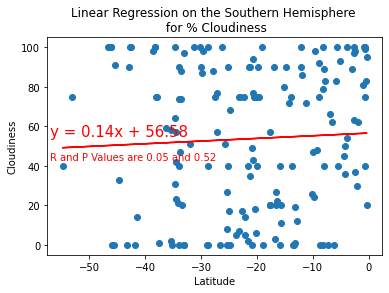

In [101]:
# Linear regression on the Southern Hemisphere CLOUDINESS
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-57,55), (-57,43))

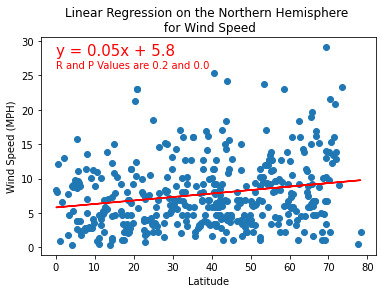

In [102]:
# Linear regression on the Northern Hemisphere WIND SPEED
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)',(0,28), (0,26))

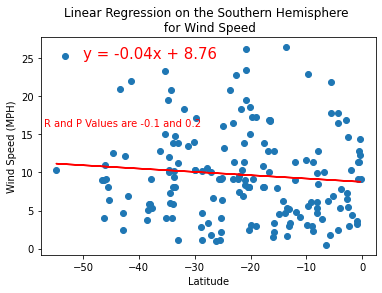

In [104]:
# Linear regression on the Southern Hemisphere WIND SPEED
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)',(-50,25), (-57,16))